In [1]:
import joblib

# Load preprocessed data
preprocessor = joblib.load("../models/preprocessor.pkl")
X_train_proc, X_test_proc, y_train, y_test = joblib.load("../models/splits.pkl")

print("X_train_proc shape:", X_train_proc.shape)
print("y_train distribution:", y_train.value_counts().to_dict())


X_train_proc shape: (242, 15)
y_train distribution: {0: 131, 1: 111}


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # ROC AUC (لو الموديل بيدعم predict_proba)
    try:
        y_proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    except:
        auc = None

    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")
    if auc is not None:
        print(f"ROC-AUC: {auc:.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.show()

    return model

Logistic Regression Results:
Accuracy: 0.869
Precision: 0.877
Recall: 0.869
F1 Score: 0.869
ROC-AUC: 0.953


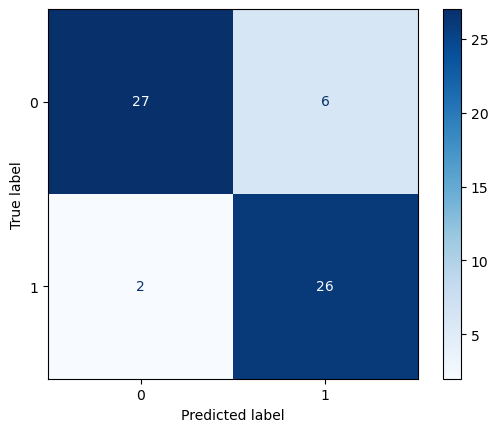

LogisticRegression(max_iter=1000, solver='liblinear')

In [4]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
print("Logistic Regression Results:")
evaluate_model(log_reg, X_train_proc, y_train, X_test_proc, y_test)

Random Forest Results:
Accuracy: 0.852
Precision: 0.864
Recall: 0.852
F1 Score: 0.852
ROC-AUC: 0.937


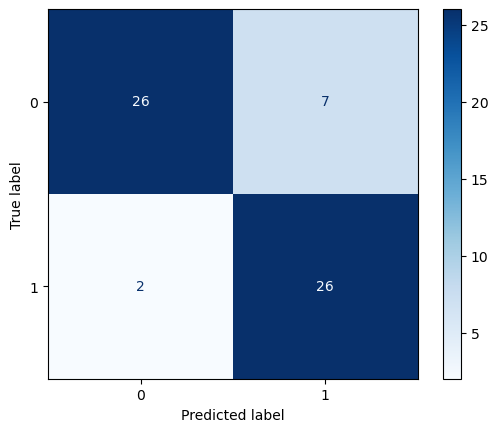

RandomForestClassifier(n_estimators=200, random_state=42)

In [5]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
print("Random Forest Results:")
evaluate_model(rf, X_train_proc, y_train, X_test_proc, y_test)

SVM Results:
Accuracy: 0.869
Precision: 0.885
Recall: 0.869
F1 Score: 0.869
ROC-AUC: 0.957


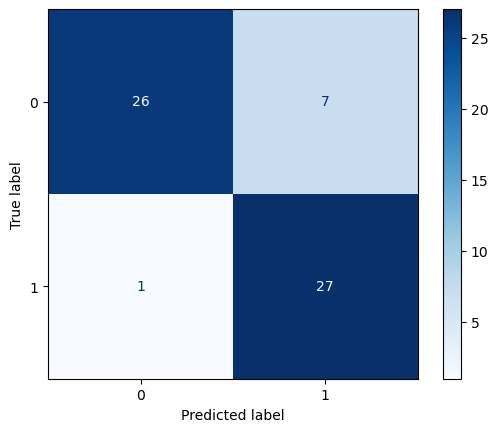

SVC(probability=True, random_state=42)

In [6]:
svm = SVC(kernel="rbf", probability=True, random_state=42)
print("SVM Results:")
evaluate_model(svm, X_train_proc, y_train, X_test_proc, y_test)

In [9]:
import pandas as pd

results = []

for name, model in [
    ("Logistic Regression", LogisticRegression(max_iter=1000, solver="liblinear")),
    ("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("SVM", SVC(kernel="rbf", probability=True, random_state=42))
]:
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([name, acc, f1])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(df_results)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.868852  0.868993
1        Random Forest  0.852459  0.852459
2                  SVM  0.868852  0.868641
